In [1]:
from tensorflow.keras import layers, models

class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36): # 입력값 784를 출력 36으로 줄임
        x_shape = (x_nodes, )
        x = layers.Input(shape=x_shape) # 입력층
        z = layers.Dense(z_dim, activation='relu')(x) # 히든 레이어 - 노드가 36개로 축소됨
        y = layers.Dense(x_nodes, activation='sigmoid')(z) # 출력층 - 다시 784개로 원상복구
        super().__init__(x, y)
        self.x = x
        self.z = z
        self.z_dim = z_dim
        self.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim, )
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data() # 비지도학습이라 label은 _로 처리
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
x_nodes = 784
z_dim = 36
autoencoder = AE(x_nodes, z_dim)
history = autoencoder.fit(X_train, X_train, epochs=15, batch_size=256, validation_split=0.2) # 비지도학습이라서 X_train이 두 번 들어감

Epoch 1/15
188/188 [==============================] - 2s 10ms/step - loss: 0.4052 - accuracy: 0.0105 - val_loss: 0.2010 - val_accuracy: 0.0163
Epoch 2/15
188/188 [==============================] - 1s 5ms/step - loss: 0.1862 - accuracy: 0.0126 - val_loss: 0.1589 - val_accuracy: 0.0133
Epoch 3/15
188/188 [==============================] - 1s 5ms/step - loss: 0.1540 - accuracy: 0.0113 - val_loss: 0.1395 - val_accuracy: 0.0119
Epoch 4/15
188/188 [==============================] - 1s 5ms/step - loss: 0.1363 - accuracy: 0.0100 - val_loss: 0.1266 - val_accuracy: 0.0100
Epoch 5/15
188/188 [==============================] - 1s 5ms/step - loss: 0.1237 - accuracy: 0.0100 - val_loss: 0.1171 - val_accuracy: 0.0099
Epoch 6/15
188/188 [==============================] - 1s 5ms/step - loss: 0.1152 - accuracy: 0.0109 - val_loss: 0.1103 - val_accuracy: 0.0104
Epoch 7/15
188/188 [==============================] - 1s 6ms/step - loss: 0.1087 - accuracy: 0.0107 - val_loss: 0.1052 - val_accuracy: 0.0098
Epoch

In [4]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train data', 'test data'], loc=0)

def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train data', 'test data'], loc=0)

def plot_loss_acc(history):
    plot_loss(history, 'loss progress')
    plt.show()
    plot_acc(history, 'accuracy progress')
    plt.show()

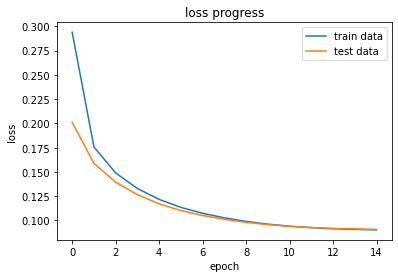

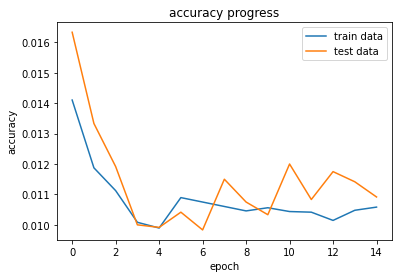

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_loss_acc(history)

In [6]:
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()
    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    n = 10
    plt.figure(figsize=(20,6))
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        plt.imshow(X_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i+1+n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(3, n, i+1+n+n)
        plt.imshow(decoded_imgs[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

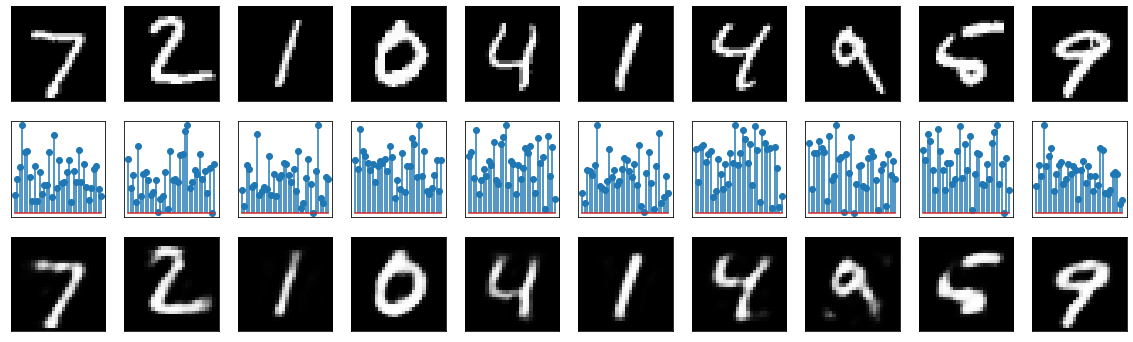

In [7]:
show_ae(autoencoder)